# Project Week 1                                     <a id="chapter1"></a>
# Table of Contents

* [Project Week 1                                    ](#chapter1)
* [Student details](#chapter2)
* [Project Description                                         ](#chapter3)
* [Data                                    ](#chapter4)
* [Predictive Power of Tie Strength                                    ](#chapter5)
* [Predictive Power of the Number of Open Triades                                    ](#chapter6)
* [Ranking Friends of Friends                                    ](#chapter7)
* [Under construction                          ](#chapter8)


# Student details <a id="chapter2"></a>

Please enter the student numbers and names in the cell below.

# Project Description                                          <a id="chapter3"></a>



Faculty employees at research universities have two major activities: teaching and research. The research is often done in collaboration with colleagues, which results in a joint publication. In this project we will analyse collaborations within the EWI department of the University of Twente based on joint publications. Such investigations are important in order to enhance the research results and applications, and in order to allocate the limited funding to the right research groups and topics.

We represent each researcher as a vertex of a graph. We draw an undirected edge between two vertexes, if the corresponding two researchers have published a joint paper. The resulting graph is called a collaboration graph. We may label each edge as a weak or strong tie depending on the number of joint papers.
In this project we want to verify the following hypotheses:


In this project we want to verify the following hypotheses:

*	The collaborations adhere to the strong triadic closure property: if two researchers A and B both actively collaborate with researcher C, then the chance is high that A and B will collaborate in the future.
*	The large number of open triades, in which two researchers participate, implies that there is a high probability that the two researchers will collaborate in the future.

You task is to explore the given data and make a case whether or not the above hypotheses are true. Additionally, you will have to develop an algorithm that ranks friends of friends by decreasing likelihood of becoming a friend in the future.

In [3]:
# The following includes are needed to work with graphs and display solutions.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from IPython.display import display
from collections import Counter
from utils import *
from graphs import *


# Data                                     <a id="chapter4"></a>
The project is based on the UT collaboration graph. We made snapshots of the UT collaboration graph upto 1995 and upto 2015. The number of publications written by two researchers is noted as the weight of this edge. The following two statements load the collaborations upto these years:

In [3]:
G1995 = fromDot(open('graphs/bib-graph-1995.dot').read())
G2015 = fromDot(open('graphs/bib-graph-2015.dot').read())

For example, the researcher 283261 collaborated with researcher 176766, 520454, 617192, 729772, and 797848 and wrote with them 1, 6, 1, 5, and 2 papers respectively. This can be seen as follows:

# Predictive Power of Tie Strength                                     <a id="chapter5"></a>

Show that the probability of a new collaboration to be formed in an open triangle A -- B -- C is increasing with the strength of A -- B and B -- C. The tie strength is defined as $\frac{(x+y)}{2}$, where $x$ is the number of collaborations between A and B, and $y$ is the number of collaborations between A and C. The probability is defined as the chance that a new edge has formed between B and C between the G1995 and G2015 graph. You can use the pyplot library (imported as *plt*) to draw a graph to illustrate your answer.


In [49]:
# BEGIN SOLUTION

def calc_tie_strength(tie0, tie1):
    # tie0 = int(tie0.split('.')[0])
    # tie1 = int(tie1.split('.')[1])
    return (float(tie0)+float(tie1))/2

def get_open_triangles(nodes_set, graph):
    results = []
    for n0 in nodes_set:
        for n1, n2 in [(n1, n2) for n1 in graph[n0] for n2 in graph[n0] if n1 > n2]:  
            if n2 not in graph[n1]:
                r = tuple(sorted([n1, n0, n2]))
                if r not in results: results.append(r)
    return results

def get_weight(dict_in_dict):
    dictionary = dict_in_dict.values()[0]
    return dictionary.values()[0]

def tie_strength(triple, graph):
    a = triple[0]
    b = triple[1]
    c = triple[2]
    edges = []
    try:
        edges.append(get_weight(graph.get_edge_data(a,b)))
    except:
        pass
    try:
        edges.append(get_weight(graph.get_edge_data(a,c)))
    except:
        pass
    try:
        edges.append(get_weight(graph.get_edge_data(b,c)))
    except:
        pass
    return calc_tie_strength(edges[0], edges[1])

def triangles(graph, n0):
    results = []
    for n1, n2 in [ (n1, n2) for n1 in graph[n0] for n2 in graph[n0] if n1 > n2 ]:
        if n2 in graph[n1]:
            r = tuple(sorted([n1, n0, n2]))
            if r not in results: results.append(r)
    return results

def get_closed_triangles(nodes0, graph):
    results = set()
    for n0 in nodes0:
        for r in triangles(graph, n0):
           results.add(r)
    return results

nodes1995 = set(G1995.nodes())
nodes2015 = set(G2015.nodes())
common_nodes = nodes1995.intersection(nodes2015)

tie_strength_list = []
for open_triple in get_open_triangles(nodes1995, G1995):
    tie_strength_var = tie_strength(open_triple, G1995)
    tie_strength_list.append((open_triple, tie_strength_var))

closed2015 = get_closed_triangles(common_nodes, G2015)

In [100]:
stayed_open = []
stayed_open_count = 0
stayed_open_total_tie = 0
stayed_open_dict = {}
went_closed = []
went_closed_count = 0
went_closed_total_tie = 0
went_closed_dict = {}
for triangle_triple in tie_strength_list:
    if triangle_triple[0] in closed2015:
        went_closed.append(triangle_triple)
        went_closed_count += 1
        went_closed_total_tie += triangle_triple[1]
        if triangle_triple[1] in went_closed_dict:
            went_closed_dict[triangle_triple[1]] += 1
        else:
            went_closed_dict[triangle_triple[1]] = 1
    else:
        stayed_open.append(triangle_triple)
        stayed_open_count += 1
        stayed_open_total_tie += triangle_triple[1]
        if triangle_triple[1] in stayed_open_dict:
            stayed_open_dict[triangle_triple[1]] += 1
        else:
            stayed_open_dict[triangle_triple[1]] = 1

stayed_open_avg = stayed_open_total_tie / stayed_open_count
print("Average tie strength of open triangles that stayed open:")
print(stayed_open_avg)
went_closed_avg = went_closed_total_tie / went_closed_count
print("Average tie strength of open triangles that closed:")
print(went_closed_avg)

keys_set = set(went_closed_dict.keys()).union(set(stayed_open_dict.keys()))

Average tie strength of open triangles that stayed open:
5.4034777982
Average tie strength of open triangles that closed:
6.55178837556


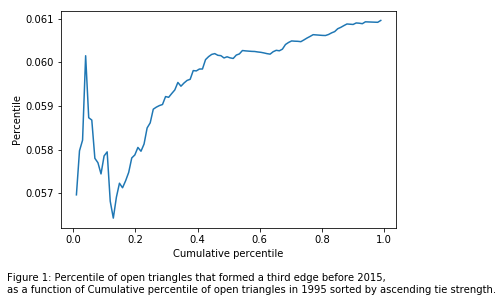

In [141]:
keys_list = list(keys_set)
keys_list.sort()
keys_list_len = len(keys_list)

changed_percentage_list = []
cumulative_percentage_list = []

range_i = 101
for i in range(1, range_i):
    percentage = (float(i)/float(range_i))
    cumulative_percentage_list.append(percentage)
    nr_keys = percentage*keys_list_len
    total_changed = 0
    total_unchanged = 0
    x = 0
    while x <= nr_keys:
        key = keys_list[x]
        if key in went_closed_dict.keys():
            total_changed += went_closed_dict[key]
        if key in stayed_open_dict.keys():
            total_unchanged += stayed_open_dict[key]
        x += 1
    changed = float(total_changed) / float(total_changed + total_unchanged)
    changed_percentage_list.append(changed)
    
plt.plot(cumulative_percentage_list, changed_percentage_list)

plt.xlabel("Cumulative percentile")
plt.ylabel("Percentile")
plt.figtext(0,-0.1,"Figure 1: Percentile of open triangles that formed a third edge before 2015, \nas a function of Cumulative percentile of open triangles in 1995 sorted by ascending tie strength.")
plt.show()

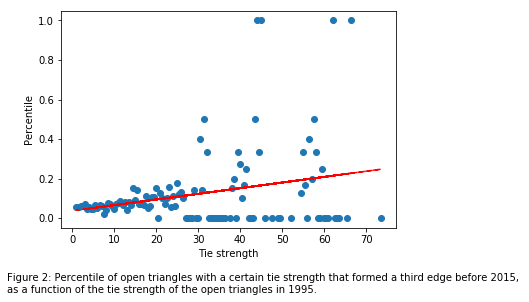

In [140]:
graph_dict = {}
for key in keys_list:
    if (key in stayed_open_dict.keys()) and (key in went_closed_dict.keys()):
        went_closed_amount = went_closed_dict[key]
        stayed_open_amount = stayed_open_dict[key]
        percentage = float(went_closed_amount) / float((went_closed_amount + stayed_open_amount))
        graph_dict[key] =  percentage
    elif key in stayed_open_dict:
        graph_dict[key] = 0
    else:
        graph_dict[key] = 1

plt.plot(graph_dict.keys(), graph_dict.values(), 'o')
plt.xlabel("Tie strength")
plt.ylabel("Percentile")
plt.figtext(0,-0.1,"Figure 2: Percentile of open triangles with a certain tie strength that formed a third edge before 2015, \nas a function of the tie strength of the open triangles in 1995.")

tl_fit = np.polyfit(graph_dict.keys(), graph_dict.values(), 1)
p = np.poly1d(tl_fit)
plt.plot(graph_dict.keys(), p(graph_dict.keys()), "r--")

plt.show()
# END SOLUTION

# Predictive Power of the Number of Open Triades                                     <a id="chapter6"></a>

Evaluate whether the number of open triades influences the probability that a new collaboration is formed between 1995 and 2015. For example, node B and C do not have an edge, but could be connected by A (one open triad), A and D (two open triades) or even A, D and E (three open triades) and so forth.

In [ ]:
G1995 = fromDot(open('graphs/bib-graph-1995.dot').read())
G2015 = fromDot(open('graphs/bib-graph-2015.dot').read())
# inplace removal unnecessary nodes
G2015.remove_nodes_from([ n for n in G2015 if (n not in set(G1995.nodes))])

In [1]:
# answers from tutorial to ensure that is done correctly 
def trianglesA(G,a):
    '''
    Calculates the number of neighbors of node 'a' that are also neighbors themselves.
    '''
    results = []
    # BEGIN SOLUTION
    for n1, n2 in [ (n1, n2) for n1 in G[a] for n2 in G[a] if n1 > n2 ]:
        if n2 in G[n1]:
            r = tuple(sorted([n1, a, n2]))
            if r not in results: results.append( r )
    # END SOLUTION
    return results

def triangles(G):
    '''
    Calculates all closed triangles in graph 'G'
    '''
    results = set()
    # BEGIN SOLUTION
    for n in G.nodes():
        for r in trianglesA(G, n):
           results.add( r )
    # END SOLUTION
    return results

def open_triangles(G):
    '''
    Cacluates the number of triades in graph ``G``.
    '''
    results = []
    # BEGIN SOLUTION
    for n in G.nodes():
        for n1, n2 in [ (n1, n2) for n1 in G[n] for n2 in G[n] if n1 > n2 ]:  
            if n2 not in G[n1]:
                r = tuple(sorted([n1, n, n2]))
                if r not in results: results.append( r )
    # END SOLUTION
    return results

In [ ]:
# triples for all open triangles in given datasets
open95 = open_triangles(G1995)
open15 = open_triangles(G2015)

In [2]:
# actual solution
# BEGIN SOLUTION
def count_open_triades(G, open_triang):
    """
    converts triad tuples (open_triang) to a dictionary of how many common neighbours they have
    example ('18282', '883925', '905252') -> ('883925', '905252'): 1
    """
    nodes = dict()
    for n1, n2, n3 in open_triang:
        if (n2 in G[n1]) and (n3 in G[n1]):
            nodes[(n2, n3)] = nodes.get((n2,n3), 0) + 1
        elif (n1 in G[n2]) and (n3 in G[n2]):
            nodes[(n1, n3)] = nodes.get((n1,n3), 0) + 1
        elif (n1 in G[n3]) and (n2 in G[n3]):
            nodes[(n1, n2)] = nodes.get((n1,n2), 0) + 1
        else:
            print n1, n2, n3
            print G[n1][n2], G[n2][n1], G[n3][n1], G[n1][n2], G[n2][n3], G[n3][n2]
            raise RuntimeError("should never happen")
    return nodes

def convert_dict(pairs):
    """
    converts ('883925', '905252'): 1 to 1: set(('883925', '905252'), etc, etc)
    """
    value_dict = dict()
    for key, value in pairs.items():
#         print key, value
        value_dict.setdefault(value, [])
        value_dict[value].append(key)
    return value_dict

# triads that did not get closed over time with the amount of shared neighbours
remained_open = count_open_triades(G1995, set(open95).intersection(set(open15)))

countable_dict_open = convert_dict(remained_open)
for key in countable_dict_open:
    countable_dict_open[key] = len(countable_dict_open[key])

# triads that did close over time with the amount of common neighbours each tuple had in 1995
closed = count_open_triades(G1995, set(open95).difference(set(open15)))

countable_dict_closed = convert_dict(closed)
for key in countable_dict_closed:
    countable_dict_closed[key] = len(countable_dict_closed[key])

max_both = max(max(countable_dict_open.keys()), max(countable_dict_closed.keys()))

totals = dict()
for x in range(0,max_both+1):
    totals[x] = countable_dict_open.get(x, 0) + countable_dict_closed.get(x, 0)
print "totals", totals


# print closed
print len(remained_open), len(closed), sum(closed.values())

print "dict_closed", countable_dict_closed
print countable_dict_closed[9]
# END SOLUTION

NameError: name 'G1995' is not defined

In [ ]:
a = [(countable_dict_closed.get(x, 0) / float(max(totals[x], 1)))*100 for x in range(0, max_both+1)]
y_pos = np.arange(len(range(0, max_both+1)))
print a
plt.bar(y_pos, a)

plt.title("correlation for number of open triades tuple and probability of triad being closed over time")
plt.xlabel("number of common neighbours through which a closed triad can be obtained")
plt.xticks(range(1, max_both+1))
plt.ylabel("probability of closure triad (%)")
plt.show()

In [ ]:
a = [(countable_dict_closed.get(x, 0) / float(max(totals[x], 1)))*100 for x in range(0, max_both+1)]
y_pos = np.arange(len(range(0, max_both+1)))
print a
plt.scatter(y_pos, a)

plt.title("correlation for number of open triades tuple and probability of triad being closed over time")
plt.xlabel("# of triads")
plt.xticks(range(1, max_both+1))
plt.ylabel("probability of closure triad (%)")
plt.show()

In [ ]:
# [countable_dict_closed.get(x, 0) / totals[x] for x in range(1, max_both+1)]
for x in range(1, max_both+1):
    print x, countable_dict_closed.get(x, 0), totals[x] 

# Ranking Friends of Friends                                     <a id="chapter7"></a>

In this exercise you should apply your knowlege gained from the two previous exercises to answer a common problem in todays social media platforms: given a person, an employee in our case, generate a ranked list of his friends of friends that are likely to become his friends. At the end of the following cell, we provide a code snippet that calculates the precision of your algorithm in predicting future ties in the top-10. 

In [ ]:
# employees to test
nodes = ['943855', '587677', '905252', '839906', '554748', '220387', '456096', '136755', '652488', '617192', '154879', '860536', '127930', '266261', '925761', '334823', '879631', '922044', '485657', '347203']
# dictionary mapping an employee to a list of employees with whom he/she collaborated in 2015 and which belonged
# to his friends of friends in 1995. 
result = {'879631': ['587677', '265264', '925761', '860536', '725186', '721127', '142327', '23872', '943855'], '127930': ['26850', '935705', '136755', '659445', '805057', '293364', '681672', '565759', '868762', '596394'], '154879': ['691913', '817338', '659445', '169325', '542646', '644335', '293364', '165240', '485657', '905252', '408618'], '587677': ['879631', '725186', '785747', '70007', '561122', '136755', '721127', '142327', '72828', '334823', '839906', '433369', '943855'], '266261': ['265264', '208388', '70007', '495819', '725186', '839906', '136755', '721127', '142327', '408600'], '860536': ['811970', '879631', '456096', '839906', '396817', '136755', '653075', '72828', '596215', '346572', '922044'], '839906': ['587677', '308351', '860536', '378229', '240448', '379649', '334823', '201753', '565759', '943855', '174262', '922044', '266261'], '347203': ['265464', '578175', '136755', '596215', '220387', '906277', '897180', '652488'], '617192': ['793831', '254964', '522310', '932010', '528813', '922964', '485657', '58492', '694245', '166980', '905252'], '136755': ['811970', '127930', '587677', '266261', '815411', '422460', '860536', '347203', '943855', '691913', '174262', '922044'], '925761': ['879631', '725186', '456096', '70007', '561122', '136803', '596215', '334823', '905252', '943855'], '554748': ['23872', '916957', '659445', '169325', '644335', '293364', '220387', '433369', '943855', '174262', '922044', '652488'], '334823': ['587677', '725186', '785747', '839906', '721127', '142327', '72828', '925761', '943855', '867536'], '220387': ['450166', '571150', '565465', '901612', '554748', '18282', '883925', '347203', '9418', '943855', '265464', '652488'], '485657': ['811970', '154879', '617192', '702341', '41963', '661899', '293364', '668817', '218489'], '905252': ['23872', '742360', '561250', '523695', '222137', '617192', '564846', '925761', '661899', '571150', '154879', '691913', '392536'], '943855': ['265264', '60541', '220387', '14499', '783415', '679997', '811970', '785747', '961828', '587677', '925761', '905502', '561122', '136755', '41963', '554748', '879631', '642974', '725186', '676753', '839906', '213482', '396817', '721127', '576951', '334823', '978812'], '456096': ['206983', '925761', '706765', '860536', '565708', '296067', '902949', '549825', '201753', '961828', '240448', '922044'], '922044': ['456096', '308351', '860536', '839906', '136755', '554748', '433369', '999230', '240448'], '652488': ['602959', '60541', '846007', '143158', '347203', '422460', '14499', '554748', '220387', '265464', '9418']}

def fof(G,n):
    '''
    returns the friends of friends of Node n in Graph G
    '''
    res = set()
    for n1 in G[n]:
        res = res | set(G[n1])
    res = res - set(G[n])
    return res

# BEGIN SOLUTION
# END SOLUTION

def score(n, f):
    '''
    calculates a score by which potential friends should be sorted
    '''
    s = 0
    # BEGIN SOLUTION
    # END SOLUTION
    return s

# Check 
topn = 20

for n in nodes:
    # get all friends of friends and their score
    fofG1995 = fof(G1995, n)
    l = [(f,score(n,f)) for f in fofG1995 ]
    # sort descending by score
    l.sort(key=lambda x: -x[1])
    # count number of correct results
    found = 0
    for x,z in l[:topn]:
        if x in result[n]:
            found += 1            
    print n, found / float(topn)

**Explanation: ** Add an explanation of your proposed algorithm here.